<a href="https://colab.research.google.com/github/coffeemug/fastai/blob/master/02-mnist-torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and displaying MNIST images

In [9]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'


In [34]:
from pathlib import Path
from urllib.request import urlretrieve
import gzip, pickle

def load_data(url):
  dir = Path('data')
  dir.mkdir(exist_ok=True)

  filepath = dir/'mnist.pkl.gz'
  if not filepath.exists():
    urlretrieve(url, filepath)

  with gzip.open(filepath, 'rb') as f:
     return pickle.load(f, encoding='latin-1')

def load_mnist():
  return load_data(MNIST_URL)

In [52]:
((x_train, y_train), (x_valid, y_valid), _) = load_mnist()

In [36]:
from itertools import islice

def unflat(vector, step):
  it = iter(vector)
  return list(iter(lambda: list(islice(it, step)), []))


In [37]:
import matplotlib as mpl, matplotlib.pyplot as plt

def show_image(x):
  mpl.rcParams['image.cmap'] = 'gray'
  plt.imshow(unflat(x, 28));

In [ ]:
show_image(x_train[1])


# Torch

In [54]:
import torch
from torch import tensor

(x_train, y_train, x_valid, y_valid) = map(tensor, (x_train, y_train, x_valid, y_valid))
(x_train, x_valid) = map(lambda t: t.reshape(-1, 28, 28), (x_train, x_valid))

In [59]:
torch.rand(5, 5)

tensor([[0.9848, 0.4951, 0.4621, 0.9256, 0.7173],
        [0.9051, 0.7110, 0.7110, 0.7542, 0.8773],
        [0.0981, 0.6447, 0.0035, 0.2289, 0.0401],
        [0.1394, 0.5047, 0.6462, 0.0939, 0.9875],
        [0.3485, 0.9037, 0.1159, 0.5933, 0.4282]])

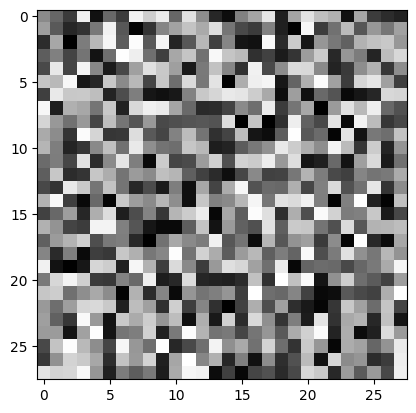

In [60]:
plt.imshow(torch.rand(28, 28))